In [33]:
# importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import pickle
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [34]:
# loading the dataset
data=pd.read_csv(r"C:\Users\Lenovo\Downloads\archive (10)\creditcard.csv")

In [35]:
# data printing
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [36]:
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [37]:
# Information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [38]:
# checking wheater the dataset has the null values or not
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [39]:
# distribution of legit and the fraud transection
data["Class"].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [40]:
# label 0 -> normal
# label 1-> fraud
legit=data[data.Class==0]
fraud=data[data.Class==1]
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [41]:
#statistical measures of the data
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [42]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [43]:
# compare the values for both transection
data.groupby("Class").mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [44]:
# Under Sampling
nor_sample=legit.sample(n=492)
nor_sample

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
158169,111044.0,2.056450,-0.124553,-1.136352,0.408457,0.065672,-0.611469,-0.140820,-0.138552,1.863847,...,-0.439986,-1.003011,0.302446,-0.601538,-0.346815,0.175341,-0.113148,-0.085262,0.89,0
236561,148865.0,-0.356883,1.378650,-0.359084,0.629592,1.298242,-0.117352,1.296719,-0.092339,-0.686339,...,0.082857,0.628690,-0.375729,-0.785119,0.150990,-0.341592,0.547160,0.286453,8.49,0
235126,148261.0,-0.831698,0.981489,0.317882,-0.092838,0.359907,0.146913,1.667097,-0.248697,-0.391982,...,-0.236103,-0.444887,-0.185543,0.537090,0.685918,0.182949,0.003401,0.050144,177.44,0
217038,140736.0,-1.105171,-0.119832,0.223711,-0.583727,1.385570,-0.969842,0.556977,0.134553,0.072702,...,-0.061235,-0.458068,0.008476,-0.559533,0.083236,-0.079135,0.044542,0.159621,71.38,0
114441,73483.0,1.217542,-0.200251,0.613016,0.688726,-0.538972,0.077229,-0.453019,0.045127,0.860100,...,0.019461,0.246052,-0.227782,-0.370207,0.599474,0.559088,0.000141,0.014544,29.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56084,47263.0,-3.407341,-3.449117,-0.434740,-2.157567,3.946622,1.637409,-1.631045,1.110994,-1.198623,...,-0.304218,-0.871054,0.649587,1.032590,0.278346,0.886728,-0.362877,-0.301010,0.95,0
59961,49089.0,-0.815310,-0.136533,1.344218,-0.932117,0.206095,1.622413,-0.093670,0.671740,-1.647606,...,0.198016,0.465372,0.067370,-1.105496,-0.023137,-0.056559,0.109124,0.073530,94.00,0
2758,2295.0,-1.297283,0.944611,3.727984,3.476081,-1.422837,1.775135,-1.408601,-2.725913,0.313660,...,-1.206529,1.347503,-1.097219,1.050092,-0.245924,0.385429,-0.287472,-0.333800,151.67,0
196006,131316.0,2.058600,0.098280,-1.842055,0.211936,0.660977,-0.337237,0.076030,-0.066143,0.257575,...,-0.337683,-0.901077,0.279731,0.100198,-0.236684,0.177790,-0.066932,-0.044424,1.98,0


In [45]:
# Concating the dataset
new_dataset=pd.concat([nor_sample,fraud],axis=0)
new_dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
158169,111044.0,2.056450,-0.124553,-1.136352,0.408457,0.065672,-0.611469,-0.140820,-0.138552,1.863847,...,-0.439986,-1.003011,0.302446,-0.601538,-0.346815,0.175341,-0.113148,-0.085262,0.89,0
236561,148865.0,-0.356883,1.378650,-0.359084,0.629592,1.298242,-0.117352,1.296719,-0.092339,-0.686339,...,0.082857,0.628690,-0.375729,-0.785119,0.150990,-0.341592,0.547160,0.286453,8.49,0
235126,148261.0,-0.831698,0.981489,0.317882,-0.092838,0.359907,0.146913,1.667097,-0.248697,-0.391982,...,-0.236103,-0.444887,-0.185543,0.537090,0.685918,0.182949,0.003401,0.050144,177.44,0
217038,140736.0,-1.105171,-0.119832,0.223711,-0.583727,1.385570,-0.969842,0.556977,0.134553,0.072702,...,-0.061235,-0.458068,0.008476,-0.559533,0.083236,-0.079135,0.044542,0.159621,71.38,0
114441,73483.0,1.217542,-0.200251,0.613016,0.688726,-0.538972,0.077229,-0.453019,0.045127,0.860100,...,0.019461,0.246052,-0.227782,-0.370207,0.599474,0.559088,0.000141,0.014544,29.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [46]:
new_dataset["Class"].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

In [47]:
new_dataset.groupby("Class").mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,97853.449187,0.071849,-0.092065,-0.024641,0.031471,0.162603,-0.046402,-0.038785,0.009946,0.034305,...,0.047189,0.023898,0.033645,-0.003889,-0.021088,0.005187,0.008515,0.010665,0.008569,87.142276
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [48]:
# spliting the Dataset /
x=new_dataset.drop(columns="Class",axis=1)
y=new_dataset["Class"]

In [49]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=2)

In [50]:
#model training
model=LogisticRegression()
model.fit(x_train,y_train)
x_pred=model.predict(x_train)
acc_xtrain=accuracy_score(x_pred,y_train)
print("Accurcy Score Train:",acc_xtrain)

Accurcy Score Train: 0.9491740787801779


c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [51]:
#model testing
x_test_pred=model.predict(x_test)
acc=accuracy_score(x_test_pred,y_test)
print("Accurcy Score Test:",acc)

Accurcy Score Test: 0.9289340101522843


In [52]:
# Confusion matrix
cm=confusion_matrix(x_test_pred,y_test)
print("Confusion Matrix\n",cm)

#model classification report
cr=classification_report(x_test_pred,y_test)
print("\nClassification Report:\n",cr)

Confusion Matrix
 [[95 10]
 [ 4 88]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.90      0.93       105
           1       0.90      0.96      0.93        92

    accuracy                           0.93       197
   macro avg       0.93      0.93      0.93       197
weighted avg       0.93      0.93      0.93       197



In [53]:
# Random Forest training
modelr=RandomForestClassifier()
modelr.fit(x_train,y_train)
x_pred_random=modelr.predict(x_train)
acc_random=accuracy_score(x_pred_random,y_train)
print("Random Forest train accuracy :",acc_random)

Random Forest train accuracy : 1.0


In [54]:
# Random forest test
x_pred_test=modelr.predict(x_test)
acc_radnom_test=accuracy_score(y_test,x_pred_test)
print("Accurcy Score Random Forest:",acc_radnom_test)

Accurcy Score Random Forest: 0.9238578680203046


In [55]:
# Confusion Matrix for random Forest
random_cm=confusion_matrix(y_test,x_pred_test)
print("Confusion Matrix :\n")
print(random_cm)

# Classification Report of Random Forest
random_cr=classification_report(y_test,x_pred_test)
print("\nclassification_report Random Foresst :\n")
print(random_cr)

Confusion Matrix :

[[96  3]
 [12 86]]

classification_report Random Foresst :

              precision    recall  f1-score   support

           0       0.89      0.97      0.93        99
           1       0.97      0.88      0.92        98

    accuracy                           0.92       197
   macro avg       0.93      0.92      0.92       197
weighted avg       0.93      0.92      0.92       197



In [56]:
# Feature Engineering

# Standard Scalling

scaler=StandardScaler()
# x['Amount']=scaler.fit_transform(x['Amount'].values.reshape(-1,1))
# x['Time']=scaler.fit_transform(x['Time'].values.reshape(-1,1))
x_scaled=scaler.fit_transform(x)

In [57]:
# Importance

importance=modelr.feature_importances_
print(importance)

[0.00600216 0.0092302  0.02382787 0.03858152 0.09692322 0.00818381
 0.00476733 0.0277937  0.00943423 0.01324773 0.16160611 0.05487247
 0.12419457 0.00740225 0.19365268 0.00605252 0.04677007 0.04661003
 0.02115485 0.01458323 0.01369366 0.00964461 0.00617528 0.00770547
 0.00561649 0.00506157 0.00732101 0.01252056 0.00530918 0.01206162]


In [58]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [59]:
# Spliting Data After The Feature Engineering

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

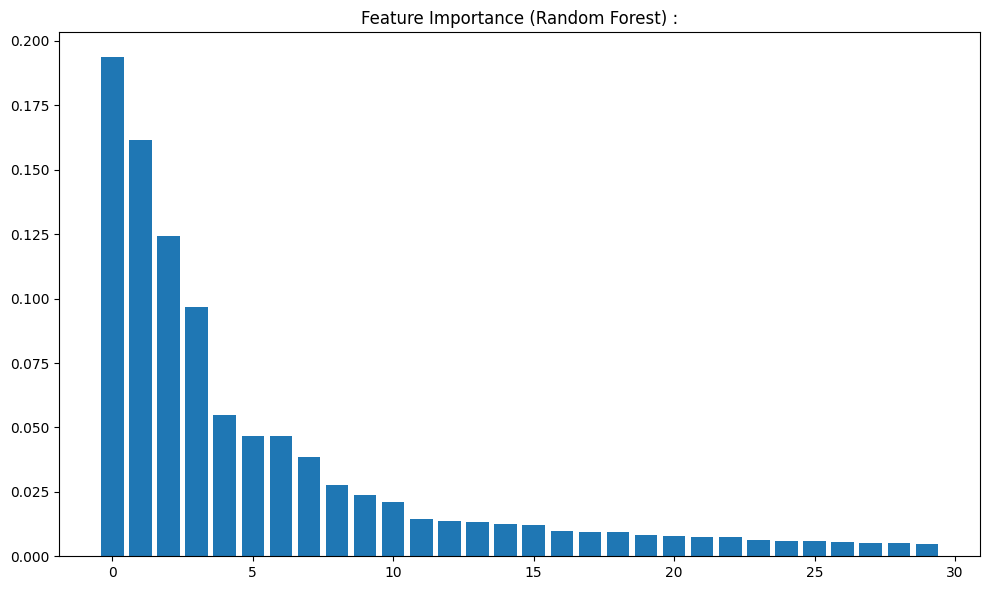

In [60]:
# Ploting the Feature Engineering

features=x.columns
indeces=np.argsort(importance)[::-1]

plt.figure(figsize=(10,6))
plt.title("Feature Importance (Random Forest) :")
plt.bar(range(len(importance)),importance[indeces])
plt.tight_layout()
plt.show()

In [61]:
# After Feature Engineering
model_logi=LogisticRegression()
model_logi.fit(x_train,y_train)

x_pred_log=model_logi.predict(x_test)
acc_log=accuracy_score(y_test,x_pred_log)

print("LogisticRegression After Feature Engineering :",acc_log)
print("confusion_matrix : \n",confusion_matrix(y_test,x_pred_log))
print("Classification Report : \n",classification_report(y_test,x_pred_log))

LogisticRegression After Feature Engineering : 0.9390862944162437
confusion_matrix : 
 [[97  2]
 [10 88]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.91      0.98      0.94        99
           1       0.98      0.90      0.94        98

    accuracy                           0.94       197
   macro avg       0.94      0.94      0.94       197
weighted avg       0.94      0.94      0.94       197



c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [62]:
model_ran=RandomForestClassifier()
model_ran.fit(x_train,y_train)

x_pred_ran=model_ran.predict(x_test)
acc_log=accuracy_score(y_test,x_pred_ran)

print("LogisticRegression After Feature Engineering Random Forest:",acc_log)
print("confusion_matrix Random Forest: \n",confusion_matrix(y_test,x_pred_ran))
print("Classification Report Random Forest: \n",classification_report(y_test,x_pred_ran))

LogisticRegression After Feature Engineering Random Forest: 0.9441624365482234
confusion_matrix Random Forest: 
 [[99  0]
 [11 87]]
Classification Report Random Forest: 
               precision    recall  f1-score   support

           0       0.90      1.00      0.95        99
           1       1.00      0.89      0.94        98

    accuracy                           0.94       197
   macro avg       0.95      0.94      0.94       197
weighted avg       0.95      0.94      0.94       197



In [63]:
# Hyper Parameter Tuning
param_grid={
    'n_estimators':[100,150],
    'max_depth':[None,10],
    'min_samples_split':[2,4],
    'min_samples_leaf':[1,2],
}

grid_search=GridSearchCV(
    estimator=RandomForestClassifier(),
    param_grid=param_grid,
    scoring='f1',
    cv=3,
    n_jobs=-1,
    verbose=1
)
grid_search.fit(x_train, y_train)

print("Best Parameter",grid_search.best_params_)
print("Best Cross-Validation F1 Score:",grid_search)

best_rf=grid_search.best_estimator_
y_pred=best_rf.predict(x_test)


print("\nAccuracy on Test set :",accuracy_score(y_test,y_pred))
print("Confusion Matrix : \n",confusion_matrix(y_test,y_pred))
print("Classification Report : \n",classification_report(y_test,y_pred))


Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best Parameter {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 150}
Best Cross-Validation F1 Score: GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 10], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 4],
                         'n_estimators': [100, 150]},
             scoring='f1', verbose=1)

Accuracy on Test set : 0.934010152284264
Confusion Matrix : 
 [[98  1]
 [12 86]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.89      0.99      0.94        99
           1       0.99      0.88      0.93        98

    accuracy                           0.93       197
   macro avg       0.94      0.93      0.93       197
weighted avg       0.94      0.93      0.93       197



In [64]:
with open('ccfd_model.pkl','wb') as f:
    pickle.dump(best_rf,f)
with open('scaler.pkl','wb') as f:
    pickle.dump(scaler,f)